Creating Animated bar chart to show cumalative number of patients in each hospital in sri lanka

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import ffmpeg

In [4]:
# loading the data set 

df=pd.read_excel('patient_data.xlsx',sheet_name='edit')
df.head()

,hospital,provice,date,value
0,IDH,Western Provice,Day-18,426
1,National_Hospital,Western Provice,Day-18,42
2,Ragama,Western Provice,Day-18,23
3,Karapitiya,Southern Provice,Day-18,82
4,Aanuradhapura,North central Provice,Day-18,19


In [5]:
# Difining colours for bars by province
colors = dict(zip(
    ["Western Provice", "Southern Provice", "North central Provice", "North Western Province","North  Province","Central Provice","Eastern Province","Sabaragamuwa Province","Uva provice"],
    ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50","#f7bb5f","#f7bb5f"]
))


In [8]:
# convert hospital and respective province to dictionary
provice_lk = df.set_index('hospital')['provice'].to_dict()

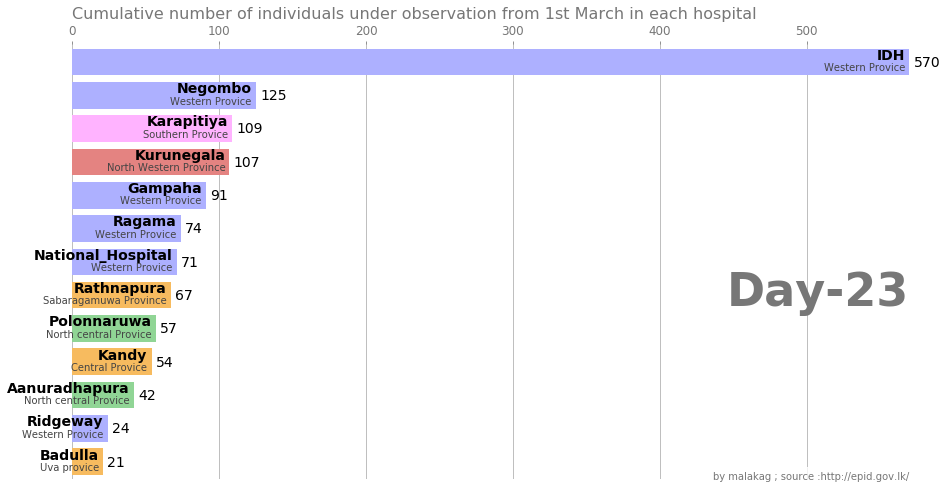

In [21]:
# defining the figure size for the plot

fig, ax = plt.subplots(figsize=(15, 8))

# # function to create barchart 

# """ input value is date and out put is figure """

def draw_barchart(date):
    
    #fig, ax = plt.subplots(figsize=(15, 8))

    dff = df[df['date'].eq(date)].sort_values(by='value', ascending=True).tail(13)
    ax.clear()
    ax.barh(dff['hospital'], dff['value'], color=[colors[provice_lk[x]] for x in dff['hospital']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['hospital'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, provice_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Cumulative number of individuals under observation from 1st March in each hospital', transform=ax.transAxes, size=16, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    #ax.text(0, 1.15, '#COVID-19#SL ',
           # transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by malakag ; source :http://epid.gov.lk/', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
draw_barchart('Day-23')

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


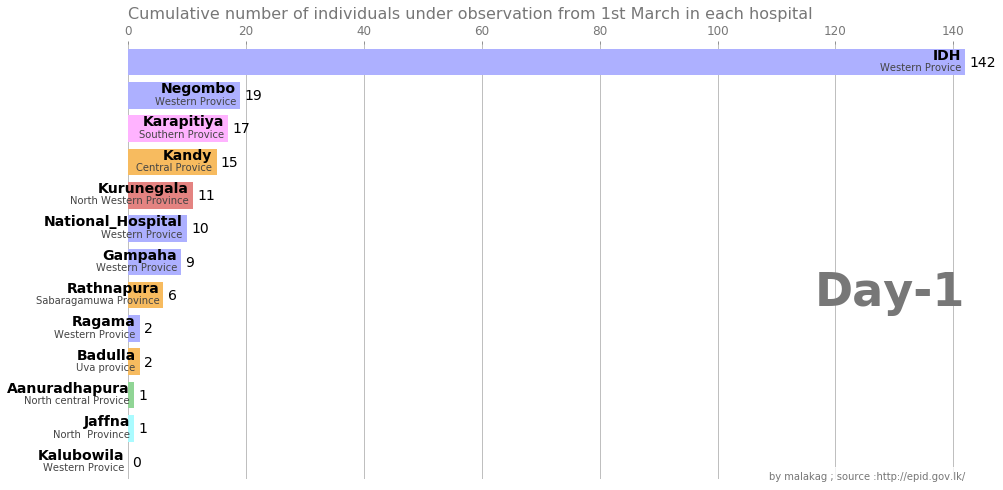

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=['Day-1','Day-2','Day-3','Day-4','Day-5','Day-6','Day-7','Day-8','Day-9','Day-10','Day-11','Day-12','Day-13','Day-14','Day-15','Day-16','Day-17','Day-18','Day-19','Day-20','Day-21','Day-22','Day-23','Day-24'])
#HTML(animator.to_jshtml())

animator.save('reportx24.gif',fps=0.9)